# Step 1 - Prepare network data
## Project: Growing Urban Bicycle Networks

This notebook downloads bicycle and street network data sets and prepares them for analysis.

Contact: Michael Szell (michael.szell@gmail.com)  
Created: 2020-06-09  
Last modified: 2021-03-10

## Preliminaries

### Parameters

In [91]:
debug = True # If True, will produce plots and/or verbose output to double-check
%run -i "../parameters/parameters.py"

Loaded parameters.



### Setup

In [92]:
%run -i path.py
#%run -i setup.py
%run -i setupCPH.py

%load_ext watermark
%watermark -n -v -m -g -iv
import statistics

Loaded PATH.

Setup finished.

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.2
IPython version      : 8.5.0

Compiler    : Clang 9.0.1 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: 622e89ad3e22ced847c13f6f0b356976fa1617ba

osmnx     : 0.16.2
networkx  : 2.8.6
pyproj    : 3.4.0
fiona     : 1.8.21
geopandas : 0.11.1
geojson   : 2.5.0
osgeo     : 3.2.1
csv       : 1.0
watermark : 2.3.1
shapely   : 1.8.4
numpy     : 1.23.3
igraph    : 0.9.1
sklearn   : 1.1.2
matplotlib: 3.6.0
sys       : 3.8.2 | packaged by conda-forge | (default, Apr 24 2020, 07:56:27) 
[Clang 9.0.1 ]
pandas    : 1.4.4



### Functions

In [93]:
%run -i functions.py

Loaded functions.



## Load carall graph and edge betweenness for each attribute

In [94]:
G_carall = ox.load_graphml('../../bikenwgrowth_external/data/copenhagen/bikedata/G_carall_graphml.graphml')

In [102]:
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/btw_length.pickle", 'rb') as f:
    btw_length_norm = pickle.load(f)
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/btw_bcount_attr.pickle", 'rb') as q:
    btw_bcount_attr_norm = pickle.load(q)
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/btw_pop_den_attr.pickle", 'rb') as g:
    btw_pop_den_attr_norm = pickle.load(g)
with open("../../bikenwgrowth_external/data/copenhagen/bikedata/btw_bcount_pop_den_attr.pickle", 'rb') as j:
    btw_bcount_pop_den_attr_norm = pickle.load(j)

NameError: name 'pop_len_attr_dict' is not defined

## Edge betweennes for the initial 'length' attribute

weight = edgelength

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


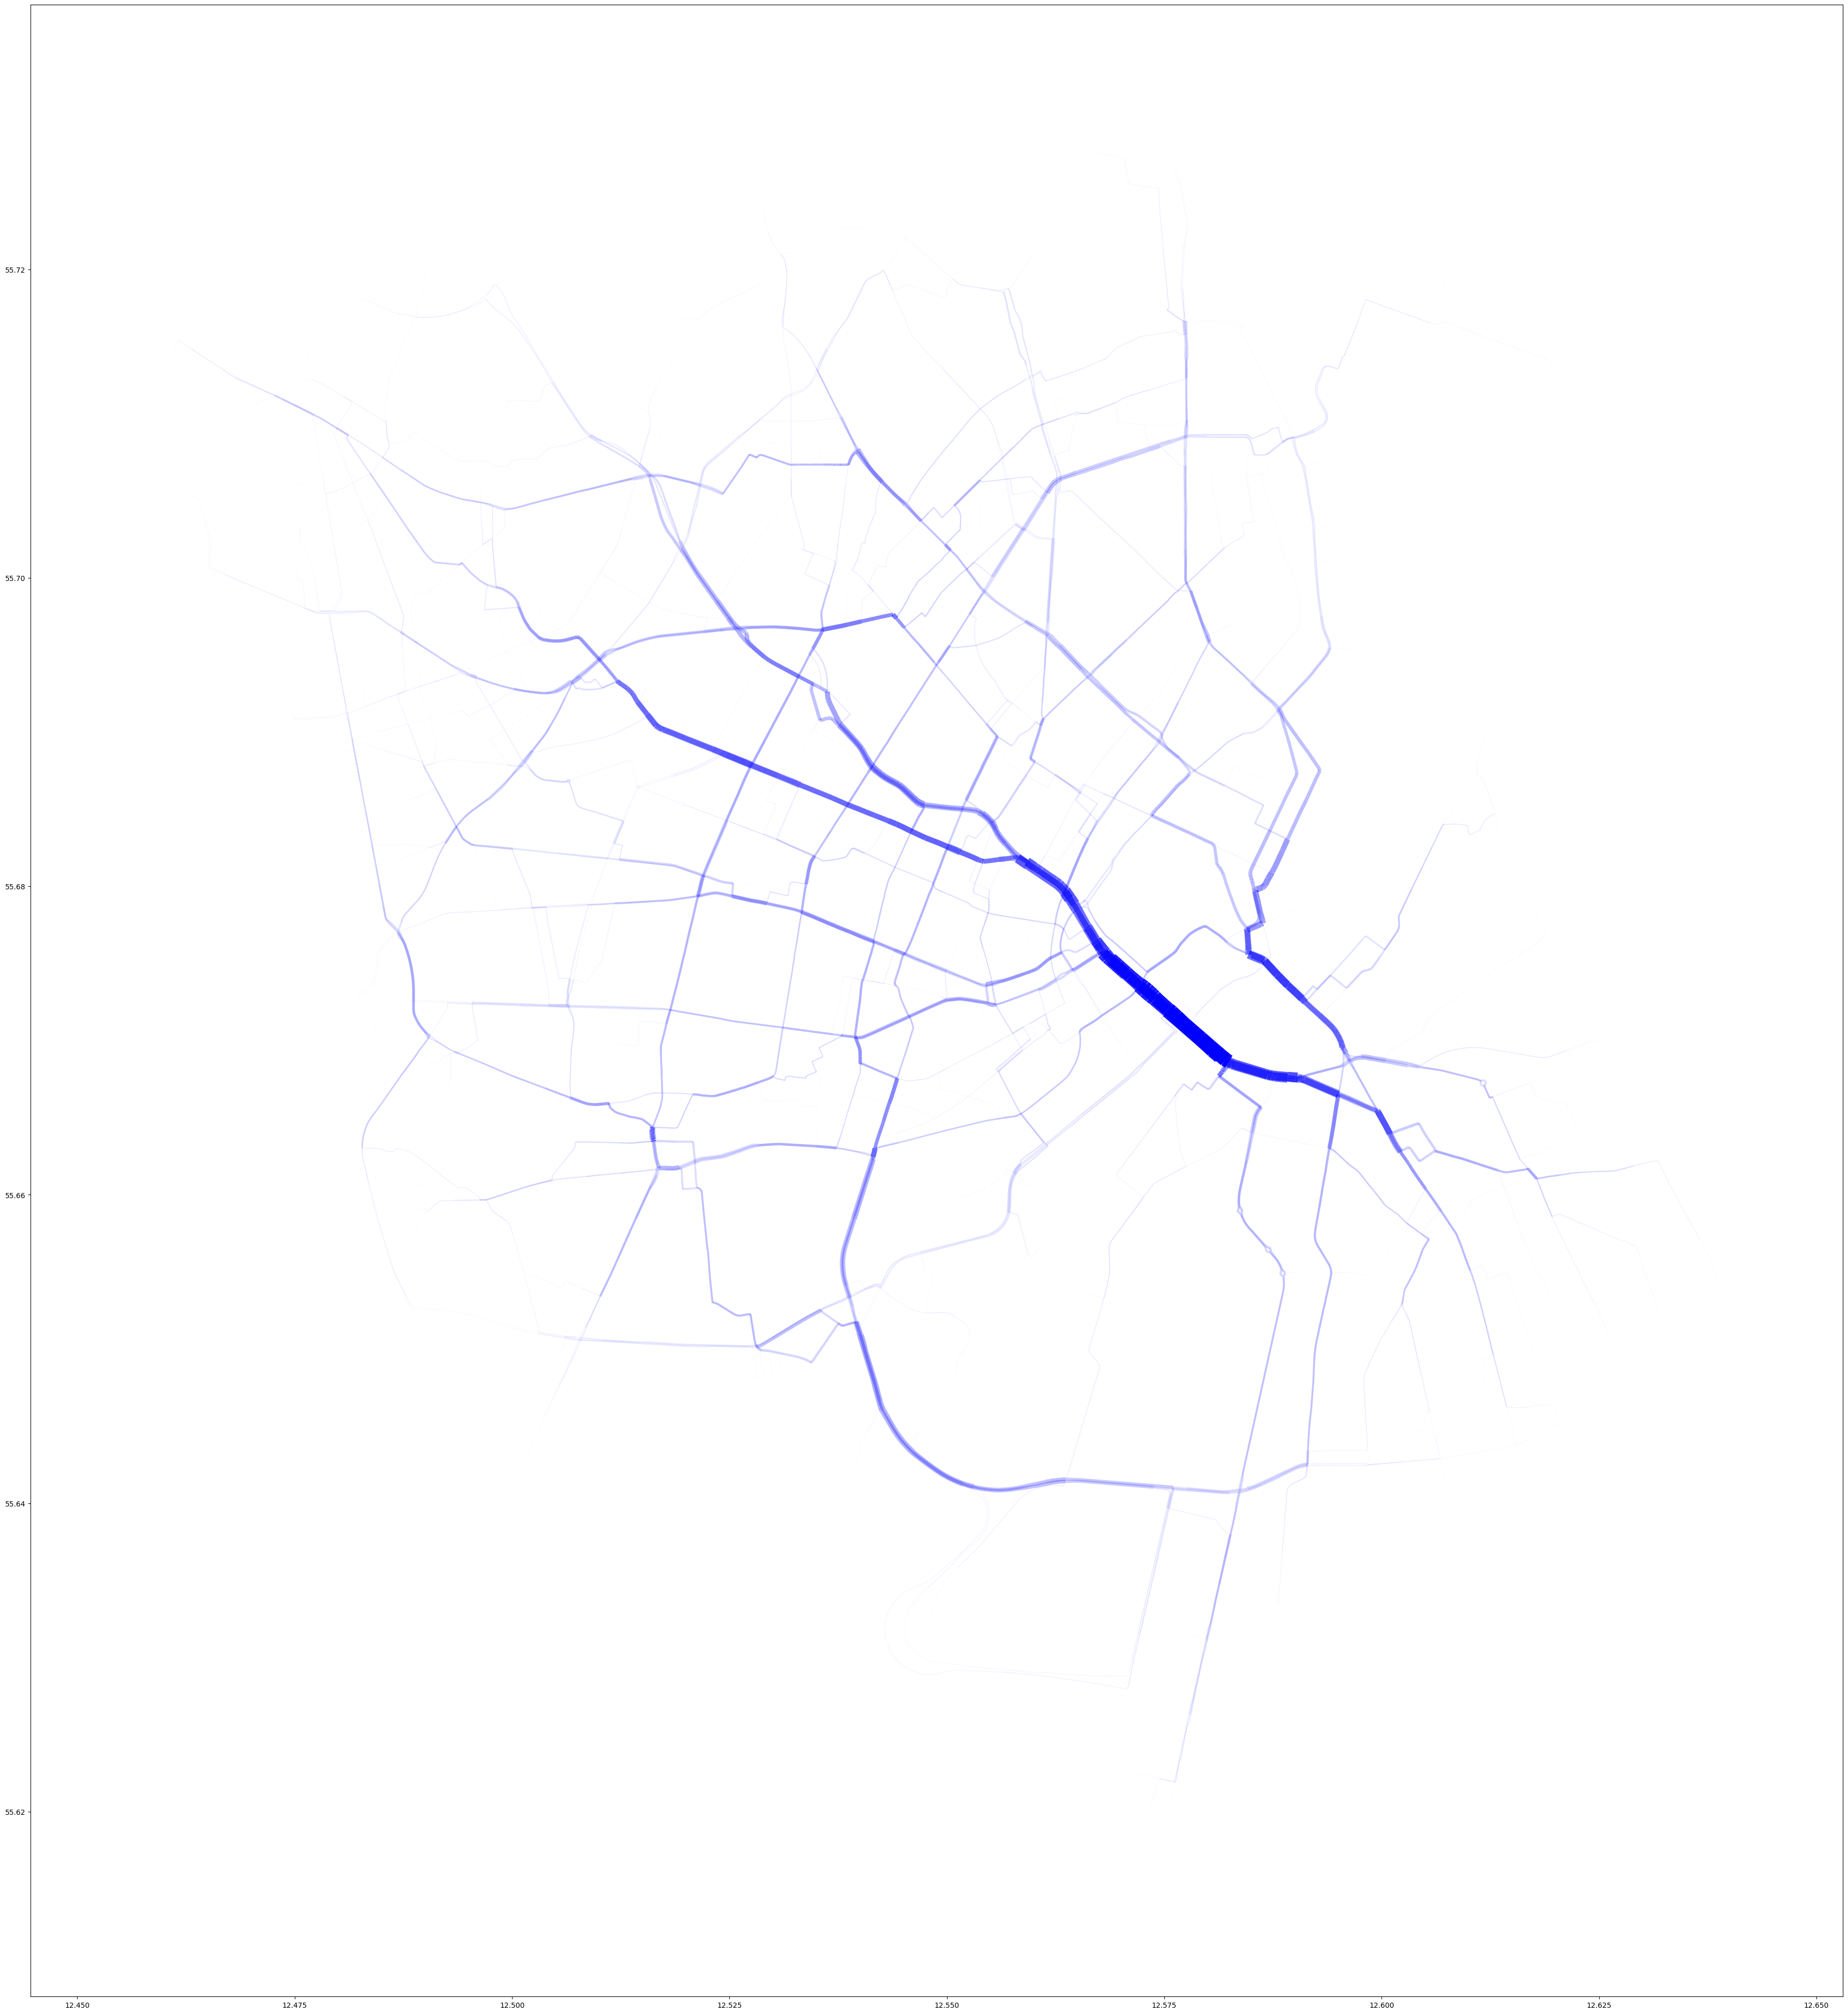

In [97]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_length_norm[k] for k in btw_length_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_length_norm[k]*20 for k in btw_length_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

## Edge betweennes for the 'bcount_attr'

weight = edgelength * (1/bikecount)

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


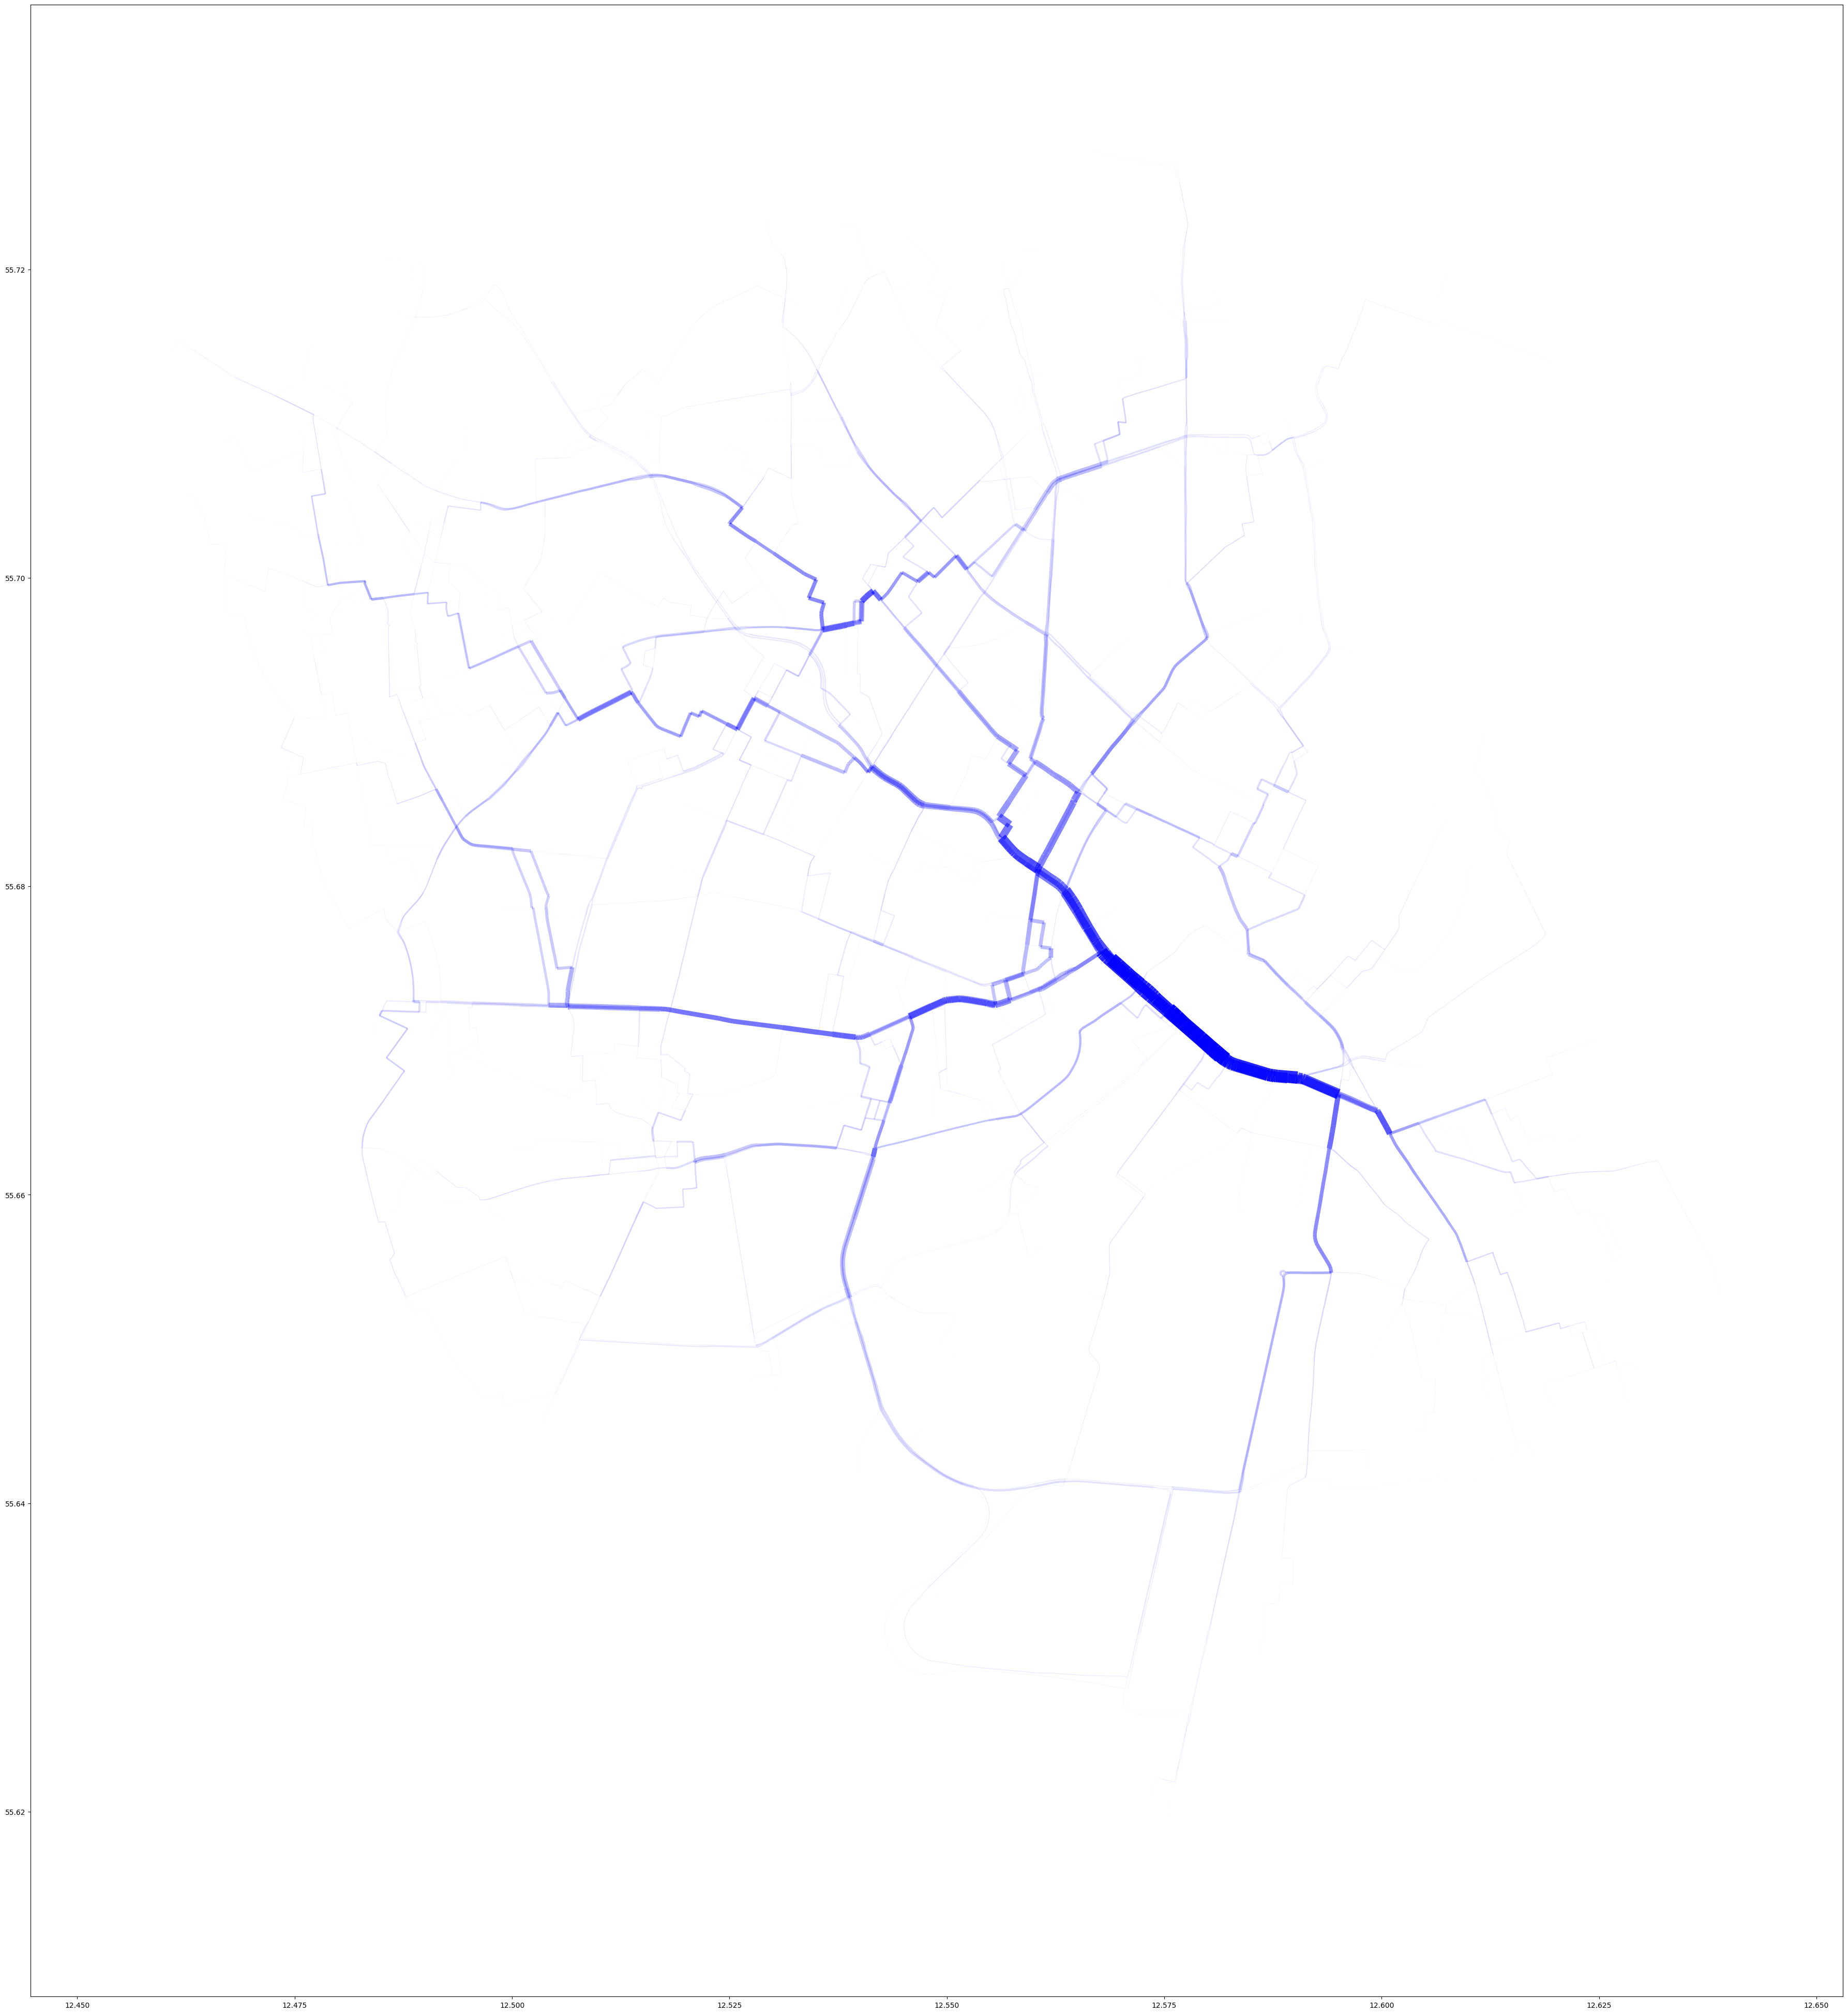

In [101]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_bcount_attr_norm[k] for k in btw_bcount_attr_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_bcount_attr_norm[k]*20 for k in btw_bcount_attr_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

## Edge betweennes for the 'pop_den_attr'

weight = edgelength * (1/populationdensity)

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


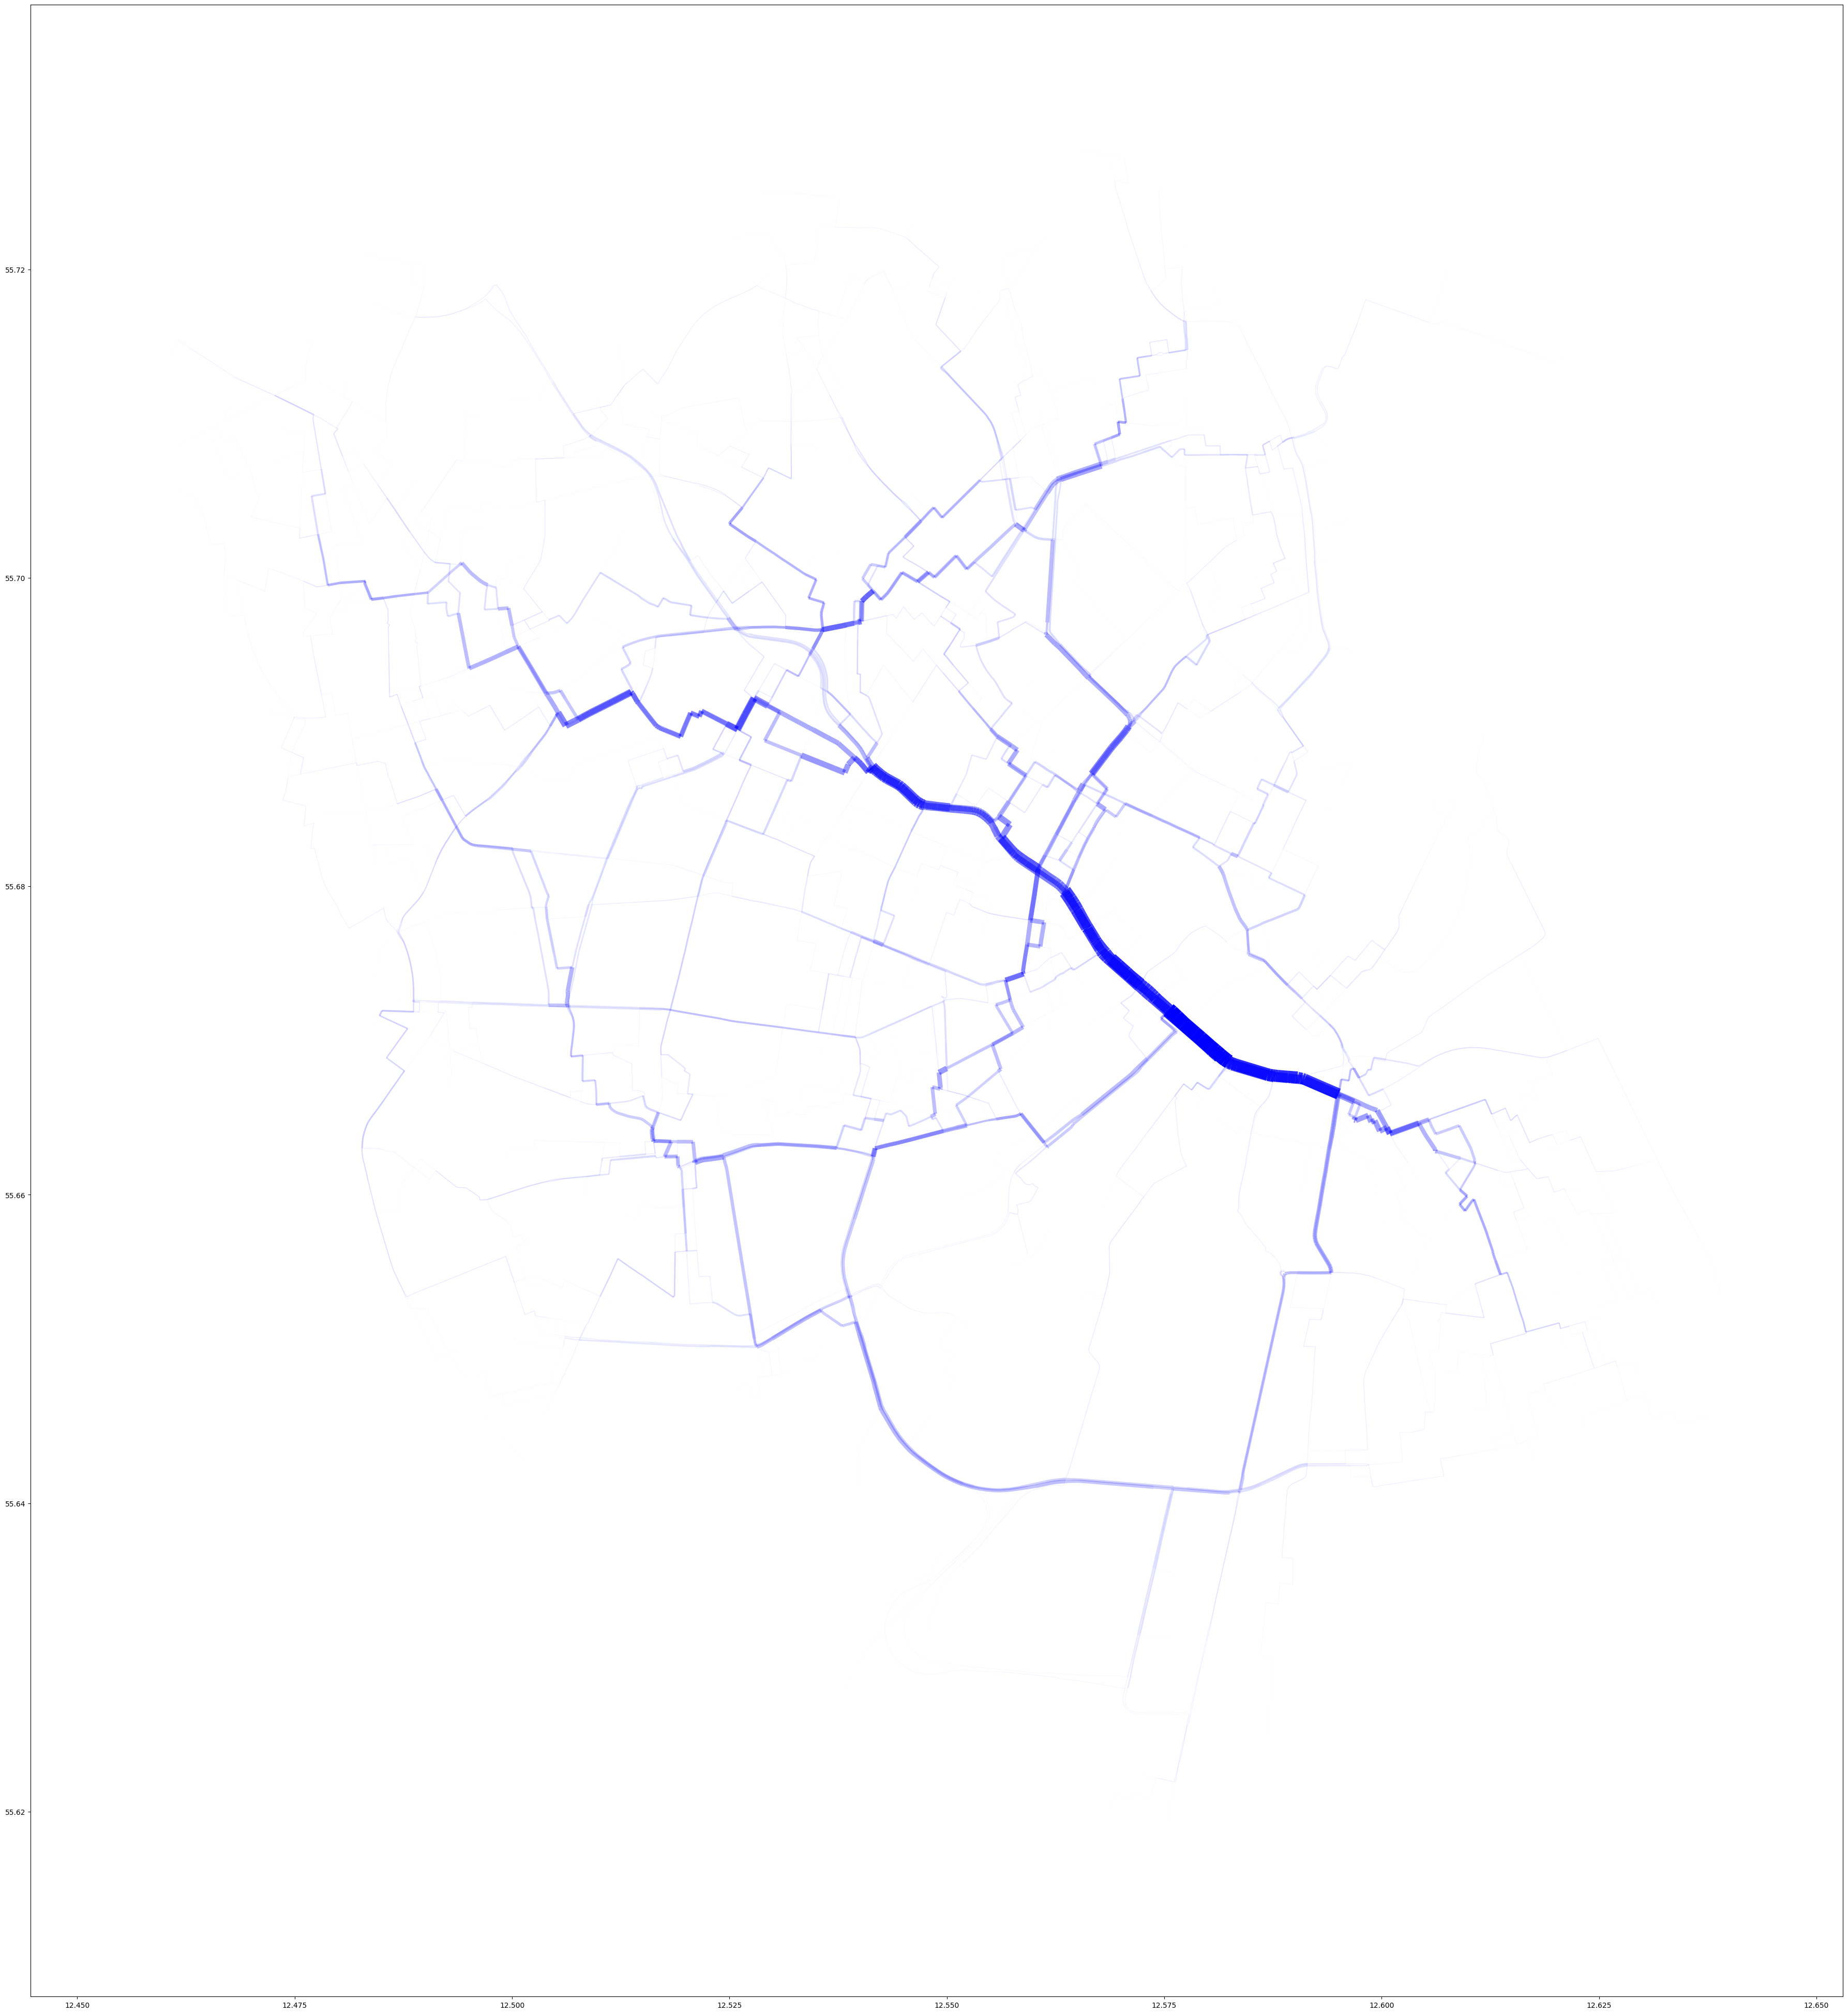

In [99]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_pop_den_attr_norm[k] for k in btw_pop_den_attr_norm]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_pop_den_attr_norm[k]*20 for k in btw_pop_den_attr_norm]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()

## Edge betweennes for the 'bcount_pop_den_attr'

alpha *(edgelength*(1/bikecount)) + (1-alpha)*(edgelength*(1/populationdensity))

/Users/Kristof/opt/anaconda3/envs/OSMNX/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


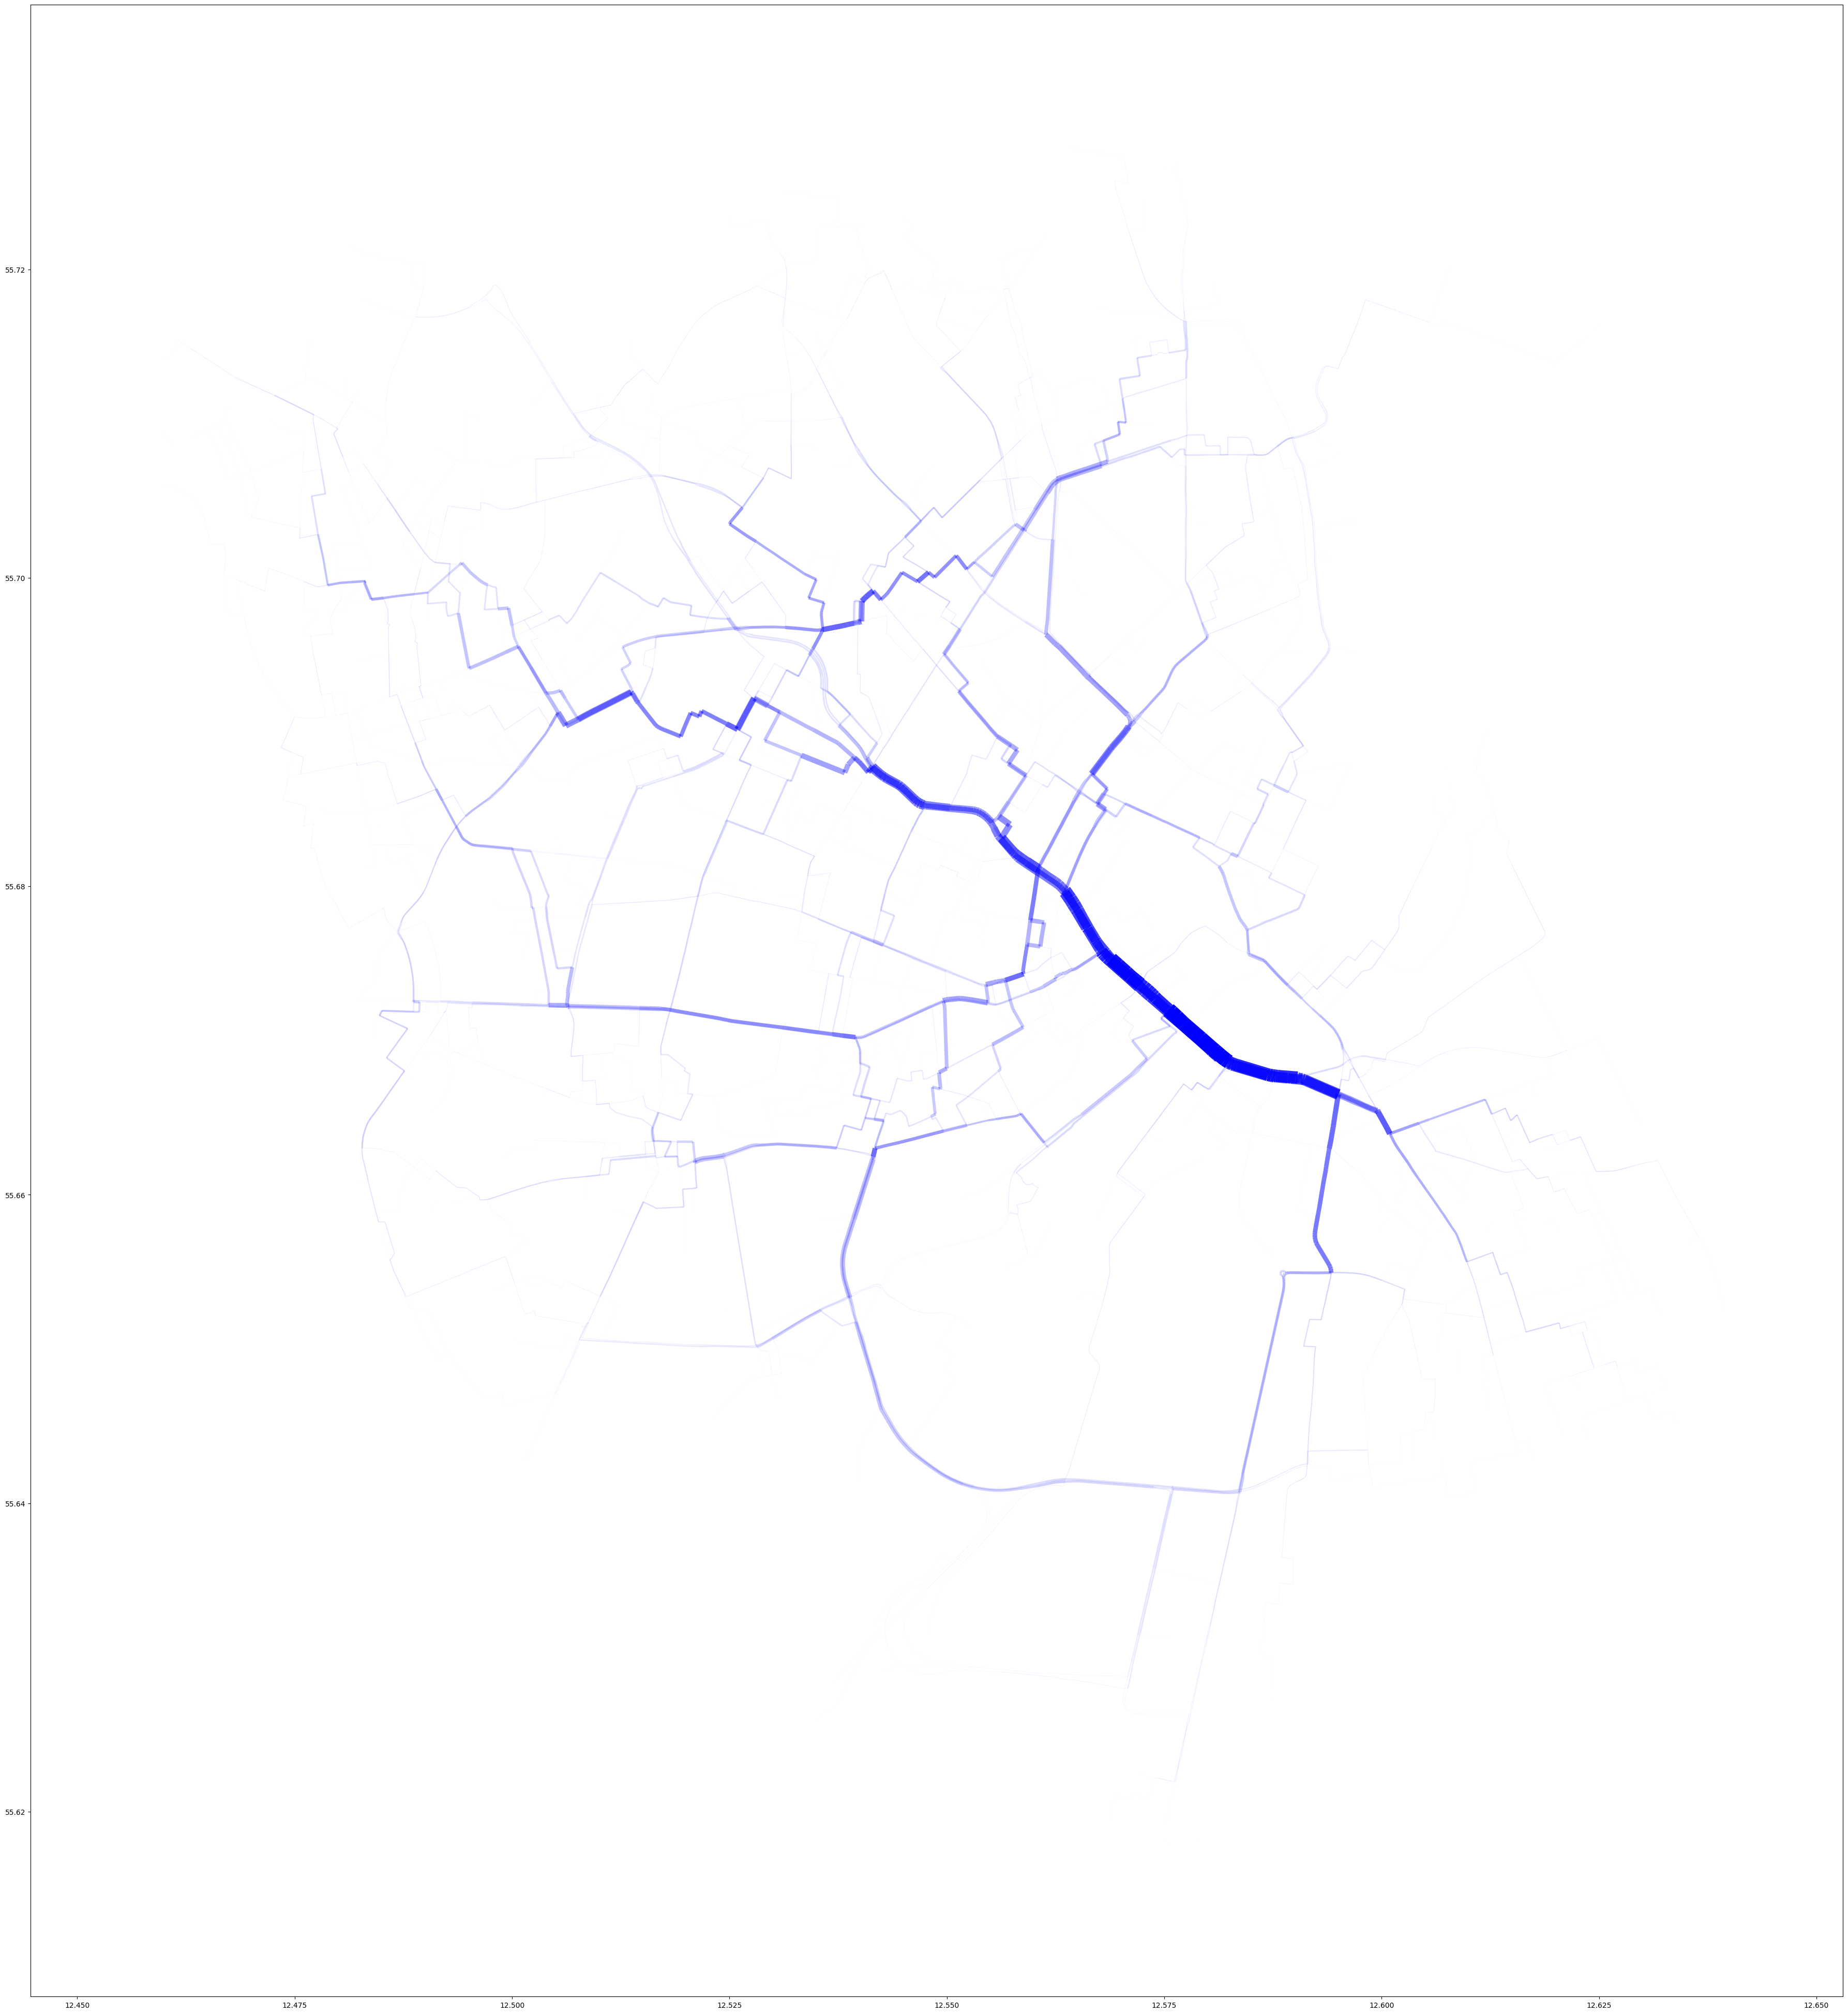

In [103]:
#This plot is edge betweenness centrality based on the 'bc_len_attr' attribute 
lanes = ox.graph_to_gdfs(G_carall, nodes=False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


ac = [btw_bcount_pop_den_attr_norm [k] for k in btw_bcount_pop_den_attr_norm ]
#ac = [0.08 if (edges_dict[k]) == meancountfraction else 0.8 for k in edges_dict]
lc = [btw_bcount_pop_den_attr_norm [k]*20 for k in btw_bcount_pop_den_attr_norm ]

ax = world[world.name == "Copenhagen municipality"].plot(color='black', edgecolor='black', figsize=(50,50),bgcolor = 'black')
#bikelanes.plot(ax=ax, color='red')
lanes.plot(ax=ax, color='blue', alpha= ac, linewidth = lc)


plt.show()